In [1]:
!pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.4 MB/s eta 0:00:00


In [2]:
# import the contents
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
from plotly.offline import iplot
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [11]:
data = pd.read_csv("./bs_dataset.csv")
data.tail(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0
594642,179,'C616528518','4','F','28007','M1823072687','28007','es_transportation',26.93,0


In [ ]:
data.isnull().values.any()

In [12]:
data.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [5]:
data.info()

#there are no missing values :D

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38726 entries, 0 to 38725
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         38726 non-null  int64  
 1   customer     38726 non-null  object 
 2   age          38726 non-null  object 
 3   gender       38726 non-null  object 
 4   zipcodeOri   38726 non-null  object 
 5   merchant     38726 non-null  object 
 6   zipMerchant  38726 non-null  object 
 7   category     38726 non-null  object 
 8   amount       38725 non-null  float64
 9   fraud        38725 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 3.0+ MB


Text(0.5, 1.0, 'Gender Distribution')

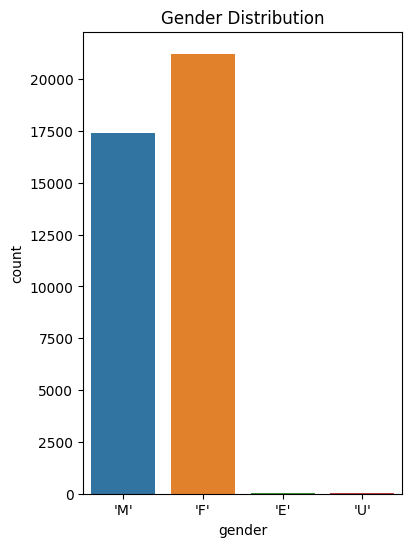

In [6]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='gender')
plt.title('Gender Distribution')

In [ ]:
# Count the occurrences of each category
category_counts = data['category'].value_counts()

# Print the counts of different categories
print(category_counts)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=category_counts.index, x=category_counts.values, orient='h', palette='viridis')
plt.xlabel('Count')
plt.title('Category Distribution')
plt.gca().invert_yaxis()  # Invert the y-axis to display the dominant category at the top
plt.show()

'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: category, dtype: int64


In [ ]:
data_fraud = data.loc[data.fraud == 1]
data_non_fraud = data.loc[data.fraud == 0]

sns.countplot(x="fraud",data=data)
plt.title("Count of Fraudulent Payments")
plt.show()
print("Regular cases: ",data_non_fraud.fraud.count())
print("Fraudulent cases: ",data_fraud.fraud.count())

Regular cases:  587443
Fraudulent cases:  7200


In [ ]:
#if fraud number closer to 1, means more proportion of fraudulent cases

print("Mean fraud values per category",data.groupby('category')['amount','fraud'].mean())

Mean fraud values per category                               amount     fraud
category                                      
'es_barsandrestaurants'    43.461014  0.018829
'es_contents'              44.547571  0.000000
'es_fashion'               65.666642  0.017973
'es_food'                  37.070405  0.000000
'es_health'               135.621367  0.105126
'es_home'                 165.670846  0.152064
'es_hotelservices'        205.614249  0.314220
'es_hyper'                 45.970421  0.045917
'es_leisure'              288.911303  0.949900
'es_otherservices'        135.881524  0.250000
'es_sportsandtoys'        215.715280  0.495252
'es_tech'                 120.947937  0.066667
'es_transportation'        26.958187  0.000000
'es_travel'              2250.409190  0.793956
'es_wellnessandbeauty'     65.511221  0.047594


In [ ]:
# Create two dataframes with fraud and non-fraud data
pd.concat([data_fraud.groupby('category')['amount'].mean(),data_non_fraud.groupby('category')['amount'].mean(),\
           data.groupby('category')['fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

In [ ]:
# Plot histograms of the amounts in fraud and non-fraud data
plt.figure(figsize=(30,10))
sns.boxplot(x=data.category,y=data.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.legend()
plt.show()

In [ ]:
def countplot_helper(data: pd.DataFrame, col: str, title: str = None, hue: str = None):
    plt.figure(figsize = (16, 12))
    plt.title(title)
    ax = sns.countplot(data = data, x = col, order = data[col].value_counts().index,
                       hue = hue if hue else None)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.0, height + 3,
                f"{round(100 * height / len(data[col]), 2)}%",
                ha = 'center')
    if data[col].nunique() > 5:
        plt.xticks(rotation=45, fontsize=17)
        plt.yticks(fontsize=17)
        plt.xlabel('Age', fontsize=18)
        plt.ylabel('Count', fontsize=16)
    plt.show()

In [ ]:
countplot_helper(data, 'age', title = 'Feature - Age Distribution', hue = 'fraud')

In [ ]:
countplot_helper(data, 'gender', title = 'Feature - Gender Distribution', hue = 'fraud')


In [ ]:
countplot_helper(data, 'category', title = 'Feature - Category Distribution')

In [ ]:
countplot_helper(data, 'category', title = 'Feature - Category Distribution', hue = 'fraud')

#notice that es_transportation which has the highest count, has 0 fraud transactions

In [ ]:
temp = data[data['category'] != "'es_transportation'"]

countplot_helper(temp, 'category', title = 'Feature - Category Distribution without ES_TRANSPORTATION', hue = 'fraud')

# this to see the category distribution without the es_transportation

In [ ]:
fraud_df = data[data['fraud'] == 1].copy()
nofraud_df = data[data['fraud'] == 0].copy()
fraud_df.shape, nofraud_df.shape

((7200, 10), (587443, 10))

In [ ]:
def countplot_helper(data, col, top_n=10):
    # Calculate the top N values in the specified column
    top_values = data[col].value_counts().head(top_n)

    # Create a countplot using Seaborn
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=col, order=top_values.index, palette='viridis')

    # Set plot labels and title
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Top {top_n} {col} Counts')

    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

countplot_helper(fraud_df, col='merchant', top_n=10)

In [ ]:
fraud_df.groupby('category')['amount'].sum().sort_values(ascending=False).iplot(kind = 'bar',
                                                  xTitle = 'Category',
                                                  yTitle = 'Amount',
                                                  title = 'Total Fradulent Amount Transacted in each Category',
                                                  color = 'blue')

In [ ]:
fraud_df[fraud_df['category'] == "'es_travel'"]['merchant'].unique()

array(["'M495352832'", "'M732195782'", "'M2080407379'"], dtype=object)

In [ ]:
fraud_df[fraud_df['category'] == "'es_travel'"][['merchant', 'amount']].groupby('merchant')['amount'].sum().iplot(kind = 'bar', xTitle = 'Merchants', yTitle = 'Amount', title = 'Total Fraudulent Amount Transacted in es_travel Category by Merchants', color = 'red')

In [ ]:
data.head()
data.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
temp = data
data['customer_encoded'] = labelencoder.fit_transform(data['customer'])
data['age'] = labelencoder.fit_transform(data['age'])
data['gender_encoded'] = labelencoder.fit_transform(data['gender'])
data['zipcodeOri_encoded'] = labelencoder.fit_transform(data['zipcodeOri'])
data['merchant_encoded'] = labelencoder.fit_transform(data['merchant'])
data['zipMerchant_encoded'] = labelencoder.fit_transform(data['zipMerchant'])
data['category_encoded'] = labelencoder.fit_transform(data['category'])

temp.head()

In [ ]:
# correlation not too good



In [ ]:
# ============== label encoding due to simplicity ==============
temp = data.drop(columns=['customer', 'gender','zipcodeOri','merchant','zipMerchant','category'])
temp.head()

In [ ]:
# data = temp
# correlation first
from sklearn.feature_selection import mutual_info_classif
def get_information_gain(X, y):
  """Calculates the information gain of each feature in the dataset.

  Args:
    X: A Pandas DataFrame containing the features of the dataset.
    y: A Pandas Series containing the target variable of the dataset.

  Returns:
    A Pandas Series containing the information gain of each feature.
  """

  # Convert string features to categorical features.
  for col in X.columns:
    if X.dtypes[col] == 'object':
      X[col] = X[col].astype('category')

  # Calculate the mutual information between each feature and the target variable.
  importances = mutual_info_classif(X, y)

  # Return the information gain of each feature.
  return pd.Series(importances, index=X.columns)

# Load the dataset
X = temp.drop(columns=["fraud"])
y = temp["fraud"]
# Get the information gain of each feature
information_gain = get_information_gain(X, y)

# Print the information gain of each feature
print(information_gain)

step                   0.000595
age                    0.027189
amount                 0.040937
customer_encoded       0.025098
gender_encoded         0.070485
zipcodeOri_encoded     0.000000
merchant_encoded       0.097337
zipMerchant_encoded    0.000000
category_encoded       0.140150
dtype: float64


In [ ]:
X = data.drop(['fraud', 'customer', 'merchant', 'gender'], 1)
y = data['fraud']
print(X)
print(y)

        step  age zipcodeOri zipMerchant             category  amount  \
0          0    4    '28007'     '28007'  'es_transportation'    4.55   
1          0    2    '28007'     '28007'  'es_transportation'   39.68   
2          0    4    '28007'     '28007'  'es_transportation'   26.89   
3          0    3    '28007'     '28007'  'es_transportation'   17.25   
4          0    5    '28007'     '28007'  'es_transportation'   35.72   
...      ...  ...        ...         ...                  ...     ...   
594638   179    3    '28007'     '28007'  'es_transportation'   20.53   
594639   179    4    '28007'     '28007'  'es_transportation'   50.73   
594640   179    2    '28007'     '28007'         'es_fashion'   22.44   
594641   179    5    '28007'     '28007'  'es_transportation'   14.46   
594642   179    4    '28007'     '28007'  'es_transportation'   26.93   

        customer_encoded  gender_encoded  zipcodeOri_encoded  \
0                    210               2                   

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_test.head())

        step  age zipcodeOri zipMerchant             category  amount  \
564243   171    3    '28007'     '28007'  'es_transportation'   17.20   
105979    38    4    '28007'     '28007'  'es_transportation'   15.24   
427560   134    3    '28007'     '28007'  'es_transportation'   12.79   
243755    82    4    '28007'     '28007'  'es_transportation'    7.90   
298453    98    1    '28007'     '28007'  'es_transportation'    3.91   

        customer_encoded  gender_encoded  zipcodeOri_encoded  \
564243              3601               1                   0   
105979               192               2                   0   
427560              3102               1                   0   
243755               862               2                   0   
298453              3917               1                   0   

        merchant_encoded  zipMerchant_encoded  category_encoded  
564243                18                    0                12  
105979                30                    

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#helps how do i use pca on this haha

ValueError: could not convert string to float: "'28007'"

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#ok i guess rly cant do pca ;-;

In [ ]:
!pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import anova

# Load the data
data2 = pd.read_csv("./bs_dataset.csv")


"""
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   step         594643 non-null  int64
 1   customer     594643 non-null  object
 2   age          594643 non-null  object
 3   gender       594643 non-null  object
 4   zipcodeOri   594643 non-null  object
 5   merchant     594643 non-null  object
 6   zipMerchant  594643 non-null  object
 7   category     594643 non-null  object
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64

"""

# Define the independent and dependent variables
X = data2['zipcodeOri']
y = data2['fraud']

# Create an ANOVA model
model = anova.AnovaLM(y, X)

# Fit the model
model.fit()

# Get the ANOVA table
anova_table = model.anova()

# Print the ANOVA table
print(anova_table)


ImportError: cannot import name 'anova' from 'statsmodels.stats.anova' (/opt/conda/lib/python3.9/site-packages/statsmodels/stats/anova.py)